# Support Vector Regression

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('data.csv')
x = dataset[['Salnty']].iloc[:1000,:].values
y = dataset[['T_degC']].iloc[:1000,:].values

## Taking care of missing data

In [3]:
from sklearn.impute import SimpleImputer
x_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = x_imputer.fit_transform(x)

In [4]:
y_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = y_imputer.fit_transform(y)

## Splitting the data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

## Training the model

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x_train, y_train)

C:\Users\yrj04\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

## Testing the model

In [8]:
y_pred = sc_y.inverse_transform(regressor.predict(x_test).reshape(-1, 1))
compare = np.concatenate((y_pred, sc_y.inverse_transform(y_test)), 1)

In [9]:
print(compare)

[[ 6.35767626  7.76      ]
 [10.30767075 13.57      ]
 [ 7.0209878   7.91      ]
 [11.75292604 12.5       ]
 [ 8.81152264  3.51      ]
 [ 3.89097878  4.3       ]
 [ 4.32375754  4.72      ]
 [11.8844397   9.83      ]
 [ 4.8174102   4.53      ]
 [12.30255862 12.46      ]
 [ 4.03365542  4.5       ]
 [12.08252905 12.19      ]
 [ 5.06873228  5.09      ]
 [ 7.17917122  5.13      ]
 [ 5.88448853  4.65      ]
 [ 3.90437838  3.99      ]
 [ 3.75058758  4.42      ]
 [ 4.16408061  3.88      ]
 [ 7.75919028  8.76      ]
 [ 7.77672601  7.58      ]
 [11.7002393   9.75      ]
 [ 8.73290906  9.21      ]
 [ 4.03365542  3.42      ]
 [10.77368043 11.5       ]
 [10.05352256 13.16      ]
 [ 4.15233125  4.19      ]
 [ 7.12744486  6.32      ]
 [11.9625046   9.02      ]
 [12.30869438 13.6       ]
 [10.77931993 10.46      ]
 [ 4.80007269  3.41      ]
 [12.23460173 10.41      ]
 [12.31673966 13.94      ]
 [ 3.94318984  3.84      ]
 [10.89204878 11.3       ]
 [12.28877757 13.13      ]
 [ 9.00473533  9.18      ]
 

## Visualizing the results

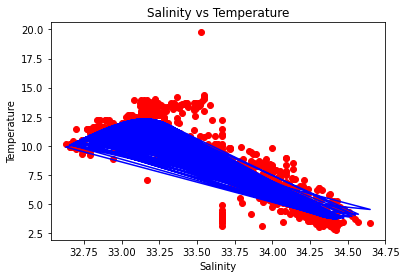

In [10]:
plt.scatter(sc_x.inverse_transform(x_train), sc_y.inverse_transform(y_train), color='red')
plt.plot(sc_x.inverse_transform(x_train), sc_y.inverse_transform(regressor.predict(x_train).reshape(-1, 1)), color='blue')
plt.title('Salinity vs Temperature')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.show()

## Evaluating the model

In [11]:
from sklearn.metrics import r2_score
r2_score(sc_y.inverse_transform(y_test), y_pred)

0.7689751920968313